['H', 'MPC', 'MC', 'RO', 'RPC']


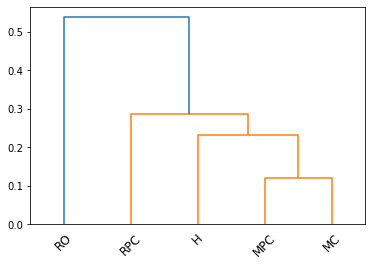

['H', 'MPC', 'MC', 'RO', 'RPC']


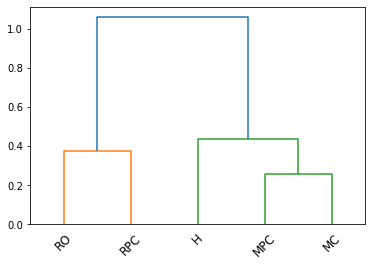

In [5]:
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../.')
from analysis.visualize_results import get_all_features
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster import hierarchy as hc
import os


def correlation_matrix(corpus):
    # The correlation matrix shown in the paper
    X, y, X_labels, y_labels = get_all_features(corpus)

    data = {x_label:x for x, x_label in zip(X.transpose(), X_labels)}
    df = pd.DataFrame(data)
    

    corr = 1 - df.corr() 

    corr_condensed = hc.distance.squareform(corr) # convert to condensed
    z = hc.linkage(corr_condensed, method='centroid')
    dendrogram = hc.dendrogram(z, labels=corr.columns, leaf_rotation=45)
    plt.savefig(os.path.join('..', 'output_figs', corpus + '_cluster.pdf'), bbox_inches='tight')
    plt.show()

correlation_matrix('classical')
correlation_matrix('modern')